Clean theCensus data
The healthcare department wants to process the 2011 census data (Data/census2011.csv) to find some relevant information about their department.
However, there is a lot of information in the data that is not relevant and can be ignored.
There are differences in the nomenclature in different datasets so a uniform nomenclature needs to be found as well. New states and Union Territories have been formed at the time of analysis which has to be taken care of so that the data can be used with the data that was captured later. 
It is also reported that some data is missing in the dataset. However, the values of some of these missing data can be found by using data from other fields. 
You have been given the responsibility to address these problems and create clean data that can be used later.



Problem Statement 1: (Keep the relevant data)
The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.
We may need the following columns.
	State name
	District name
	Population
	Male
	Female
	Literate
	Male_Literate
	Female_Literate
	Rural_Households
	Urban_Households
	Households
	Age_Group_0_29
	Age_Group_30_49
	Age_Group_50
	Age not stated
Import the data to pandas and keep only the required columns. 
Problem Statement 2: (Rename the Column names)
For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 
	State name  to State/UT
	District name  to District
	Male_Literate to Literate_Male
	Female_Literate to Literate_Female
	Rural_Households  to Households_Rural
	Urban_ Households  to Households_Urban
	Age_Group_0_29 to Young_and_Adult
	Age_Group_30_49 to Middle_Aged
	Age_Group_50 to Senior_Citizen
	Age not stated to Age_Not_Stated



Problem Statement 3: (Rename State/UT Names)
The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.
Examples: 
	Andaman and Nicobar Islands
	Arunachal Pradesh
	Bihar



Problem Statement 4: (New State/UT formation)
	In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt. Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

	In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts.


Problem Statement 5: (Find and process Missing Data)
Find and store the percentage of data missing for each column.
Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

Hint:

	Population = Male + Female
	Literate = Literate_Male + Literate_Female
	Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated
	Households = Households_Rural + Households_Urban

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 

Problem Statement 6: (Save Data)
Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#checking the library versions

print('pandas version:',pd.__version__)
print('matplotlib version:',matplotlib.__version__)
print('seaborn version:',sns.__version__)

pandas version: 1.5.3
matplotlib version: 3.7.0
seaborn version: 0.12.2



Problem Statement 1: (Keep the relevant data)
The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.
We may need the following columns.
	State name
	District name
	Population
	Male
	Female
	Literate
	Male_Literate
	Female_Literate
	Rural_Households
	Urban_Households
	Households
	Age_Group_0_29
	Age_Group_30_49
	Age_Group_50
	Age not stated
Import the data to pandas and keep only the required columns. 

In [3]:
#importing data
census_data=pd.read_csv(
    'census_2011.csv',
    usecols=['State name','District name',
    'Population','Male','Female','Literate','Male_Literate','Female_Literate','Rural_Households','Urban_Households','Households',
    'Age_Group_0_29','Age_Group_30_49','Age_Group_50','Age not stated']
             )
census_data.head(2)

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0


Problem Statement 2: (Rename the Column names)
For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 
	State name  to State/UT
	District name  to District
	Male_Literate to Literate_Male
	Female_Literate to Literate_Female
	Rural_Households  to Households_Rural
	Urban_ Households  to Households_Urban
	Age_Group_0_29 to Young_and_Adult
	Age_Group_30_49 to Middle_Aged
	Age_Group_50 to Senior_Citizen
	Age not stated to Age_Not_Stated

In [4]:
census_data.rename(columns={
    'State name':'State/UT',
    'District name':'District',
    'Male_Literate':'Literate_Male',
    'Female_Literate':'Literate_Female',
    'Rural_Households':'Households_Rural',
    'Urban_ Households':'Households_Urban',
    'Age_Group_0_29':'Young_and_Adult',
    'Age_Group_30_49':'Middle_Aged',
    'Age_Group_50':'Senior_Citizen',
    'Age not stated':'Age_Not_Stated'
    },inplace=True)
census_data.columns

Index(['State/UT', 'District', 'Population', 'Male', 'Female', 'Literate',
       'Literate_Male', 'Literate_Female', 'Households_Rural',
       'Urban_Households', 'Households', 'Young_and_Adult', 'Middle_Aged',
       'Senior_Citizen', 'Age_Not_Stated'],
      dtype='object')

In [5]:
#function to fix state names
def fix_states(state):
    if state == 'NCT OF DELHI':
        return 'Delhi'
    elif state == 'ORISSA':
        return 'Odisha'
    elif state == 'PONDICHERRY':
        return 'Puducherry'
    else:
        return state
census_data['State/UT']=census_data['State/UT'].apply(fix_states)

Problem Statement 3: (Rename State/UT Names)
The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.
Examples: 
	Andaman and Nicobar Islands
	Arunachal Pradesh
	Bihar

In [6]:
census_data['State/UT'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'Delhi', 'RAJASTHAN', 'UTTAR PRADESH',
       'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH', 'NAGALAND', 'MANIPUR',
       'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM', 'WEST BENGAL',
       'JHARKHAND', 'Odisha', 'CHHATTISGARH', 'MADHYA PRADESH', 'GUJARAT',
       'DAMAN AND DIU', 'DADRA AND NAGAR HAVELI', 'MAHARASHTRA',
       'ANDHRA PRADESH', 'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA',
       'TAMIL NADU', 'Puducherry', 'ANDAMAN AND NICOBAR ISLANDS'],
      dtype=object)

In [7]:
u=census_data['State/UT'].unique()
for i in u:
    words=i.lower().split()
    changed_words=[]
    for word in words:
        if word=='and':
            changed_words.append(word)
        else:
            changed_words.append(word.capitalize())
    final_name=' '.join(changed_words)
    census_data.loc[census_data['State/UT']==i,'State/UT']=final_name
census_data['State/UT'].unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 'Gujarat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharashtra',
       'Andhra Pradesh', 'Karnataka', 'Goa', 'Lakshadweep', 'Kerala',
       'Tamil Nadu', 'Puducherry', 'Andaman and Nicobar Islands'],
      dtype=object)


Problem Statement 4: (New State/UT formation)
	In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt. Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

	In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts.

In [11]:
# importing txt file data
telangana_districts=pd.read_csv('Telangana.txt',names=['district'])
#updating telanagna districts
td=telangana_districts['district'].unique()
for district in td:
    census_data.loc[census_data['District']==district,'State/UT']='Telangana'
#updating laddakh districts
census_data.loc[census_data['District']=='Leh','State/UT']='Laddakh'
census_data.loc[census_data['District']=='Kargil','State/UT']='Laddakh'
census_data['State/UT'].unique()

array(['Jammu and Kashmir', 'Laddakh', 'Himachal Pradesh', 'Punjab',
       'Chandigarh', 'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunachal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Odisha', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Maharashtra', 'Telangana',
       'Andhra Pradesh', 'Karnataka', 'Goa', 'Lakshadweep', 'Kerala',
       'Tamil Nadu', 'Puducherry', 'Andaman and Nicobar Islands'],
      dtype=object)

Problem Statement 5: (Find and process Missing Data)
Find and store the percentage of data missing for each column.
Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

Hint:

	Population = Male + Female
	Literate = Literate_Male + Literate_Female
	Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated
	Households = Households_Rural + Households_Urban

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 

In [12]:
#finding the percentage of missing data before imputation
cols=census_data.columns
Missing_data_percentage=dict()
for i in cols:
    Missing_data_percentage[i]=round(census_data[i].isnull().sum()/len(census_data)*100,2)
Missing_data_percentage

{'State/UT': 0.0,
 'District': 0.0,
 'Population': 4.69,
 'Male': 4.69,
 'Female': 5.16,
 'Literate': 5.62,
 'Literate_Male': 4.84,
 'Literate_Female': 4.22,
 'Households_Rural': 6.56,
 'Urban_Households': 5.16,
 'Households': 5.0,
 'Young_and_Adult': 4.84,
 'Middle_Aged': 4.69,
 'Senior_Citizen': 4.84,
 'Age_Not_Stated': 5.47}

In [13]:
#missing data imputation
data=census_data
data['Population'].fillna(data['Male']+data['Female'],inplace=True)
data['Literate'].fillna(data['Literate_Male']+data['Literate_Female'],inplace=True)
data['Households'].fillna(data['Urban_Households']+data['Households_Rural'],inplace=True)
data['Male'].fillna(data['Population']-data['Female'],inplace=True)
data['Female'].fillna(data['Population']-data['Male'],inplace=True)
data['Literate_Male'].fillna(data['Literate']-data['Literate_Female'],inplace=True)
data['Literate_Female'].fillna(data['Literate']-data['Literate_Male'],inplace=True)
data['Households_Rural'].fillna(data['Households']-data['Urban_Households'],inplace=True)
data['Urban_Households'].fillna(data['Households']-data['Households_Rural'],inplace=True)
data['Young_and_Adult'].fillna(data['Population']-(data['Middle_Aged']+data['Senior_Citizen']+data['Age_Not_Stated']),inplace=True)
data['Middle_Aged'].fillna(data['Population']-(data['Young_and_Adult']+data['Senior_Citizen']+data['Age_Not_Stated']),inplace=True)
data['Senior_Citizen'].fillna(data['Population']-(data['Middle_Aged']+data['Young_and_Adult']+data['Age_Not_Stated']),inplace=True)
data['Age_Not_Stated'].fillna(data['Population']-(data['Middle_Aged']+data['Young_and_Adult']+data['Senior_Citizen']),inplace=True)


In [14]:
data.isnull().sum()

State/UT            0
District            0
Population          1
Male                1
Female              0
Literate            2
Literate_Male       2
Literate_Female     2
Households_Rural    6
Urban_Households    3
Households          5
Young_and_Adult     4
Middle_Aged         6
Senior_Citizen      8
Age_Not_Stated      3
dtype: int64

In [15]:
#finding the percentage of missing data After imputation
cols=data.columns
Missing_data_percentage_after=dict()
for i in cols:
    Missing_data_percentage_after[i]=round(data[i].isnull().sum()/len(data)*100,2)
Missing_data_percentage_after

{'State/UT': 0.0,
 'District': 0.0,
 'Population': 0.16,
 'Male': 0.16,
 'Female': 0.0,
 'Literate': 0.31,
 'Literate_Male': 0.31,
 'Literate_Female': 0.31,
 'Households_Rural': 0.94,
 'Urban_Households': 0.47,
 'Households': 0.78,
 'Young_and_Adult': 0.62,
 'Middle_Aged': 0.94,
 'Senior_Citizen': 1.25,
 'Age_Not_Stated': 0.47}

<Axes: >

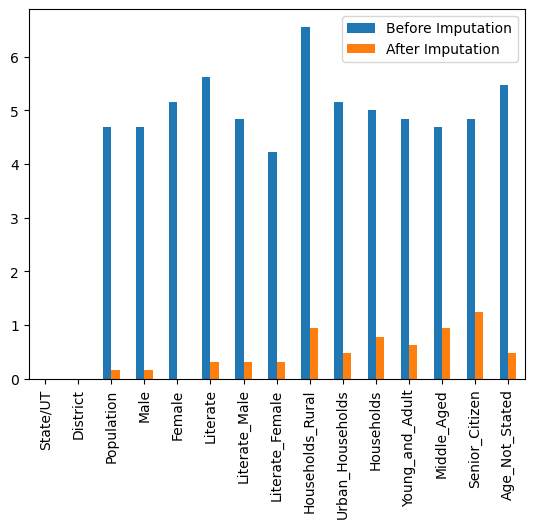

In [16]:
#visualising percentages before and after imputation of missing values
d={'Before Imputation':Missing_data_percentage,'After Imputation':Missing_data_percentage_after}
p=pd.DataFrame(d)
p.plot(kind='bar')

Problem Statement 6: (Save Data)
Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.

In [17]:
file_path = "Clean_Data/census.csv"
data.to_csv(file_path, index=False)

print("Csv file saved succesfully")


Csv file saved succesfully


Problem Statement 7: (Process the relevant data)
From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.
	District Name
	Rural/Urban
	Total Number of households
	Total Number of Livable
	Total Number of Dilapidated
	Latrine_premise

In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms.
The total number of households in a district can be found in the census data. Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.

Calculate the data and rename the column names and save it in a CSV filenamed “housing.csv” in the “Clean_Data” folder, such that it  has the following column names:
	District
	Households_Rural
	Households_Rural_Livable
	Households_Rural_Dilapidated
	Households_Rural_Toilet_Premise
	Households_Urban
	Households_Urban_Livable
	Households_Urban_Dilapidated
	Households_Urban_Toilet_Premise

Report if any district data is in one file but not the other.


In [131]:
#importing household dataset
household_data=pd.read_csv('housing.csv',usecols=[
    'District Name','Rural/Urban','Total Number of households','Total Number of Livable','Total Number of Dilapidated','Latrine_premise'
    ])
household_data

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...
1903,North & Middle Andaman,Total,100,44.6,2.8,48.3
1904,North & Middle Andaman,Urban,100,55.9,6.6,56.1
1905,South Andaman,Rural,100,33.5,3.5,64.7
1906,South Andaman,Total,100,26.4,2.2,78.3


In [132]:
#renaming for merge
household_data.rename(columns={'District Name':'District'},inplace=True)
household_data

,District,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...
1903,North & Middle Andaman,Total,100,44.6,2.8,48.3
1904,North & Middle Andaman,Urban,100,55.9,6.6,56.1
1905,South Andaman,Rural,100,33.5,3.5,64.7
1906,South Andaman,Total,100,26.4,2.2,78.3


In [133]:
# Grouping the dataset by district and rural/urban
household_grouped = household_data.groupby(['District', 'Rural/Urban']).sum().unstack()

# converting rows to columns
household_grouped.columns = [f'{col[0]}_{col[1]}' for col in household_grouped.columns]

# Reset the index to convert the grouped columns back to regular columns
household_grouped = household_grouped.reset_index()

#final modified dataset after dividing rural urban
New_household_data=household_grouped

In [138]:
Modified_household_data=pd.merge(New_household_data[['District','Total Number of households_Rural','Total Number of households_Urban','Total Number of Livable_Rural','Total Number of Livable_Urban','Total Number of Dilapidated_Rural','Total Number of Dilapidated_Urban','Latrine_premise_Rural','Latrine_premise_Urban']],census_data[['District','Households_Rural','Urban_Households','Households','Population']],on='District')
Modified_household_data['Households_Rural_Livable']=round((Modified_household_data['Total Number of Livable_Rural']/100)*Modified_household_data['Households_Rural'])
Modified_household_data['Households_Rural_Dilapidated']=round((Modified_household_data['Total Number of Dilapidated_Rural']/100)*Modified_household_data['Households_Rural'])
Modified_household_data['Households_Rural_Toilet_Premise']=round((Modified_household_data['Latrine_premise_Rural']/100)*Modified_household_data['Households_Rural'])

Modified_household_data['Households_Urban_Livable']=round((Modified_household_data['Total Number of Livable_Urban']/100)*Modified_household_data['Urban_Households'])
Modified_household_data['Households_Urban_Dilapidated']=round((Modified_household_data['Total Number of Dilapidated_Urban']/100)*Modified_household_data['Urban_Households'])
Modified_household_data['Households_Urban_Toilet_Premise']=round((Modified_household_data['Latrine_premise_Urban']/100)*Modified_household_data['Urban_Households'])



Final_household_data=Modified_household_data[['District','Households_Rural','Households_Rural_Livable',
       'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise','Urban_Households','Households_Urban_Livable', 'Households_Urban_Dilapidated',
       'Households_Urban_Toilet_Premise']]

Final_household_data

,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Urban_Households,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Adilabad,597466.0,213295.0,38835.0,82450.0,220248.0,51758.0,6167.0,155715.0
1,Agra,496971.0,262898.0,21370.0,82497.0,406852.0,155417.0,7730.0,333619.0
2,Ahmadabad,353169.0,143033.0,7063.0,116193.0,1845383.0,441047.0,11072.0,1699598.0
3,Ahmadnagar,1041393.0,318666.0,77063.0,407185.0,282011.0,65145.0,7050.0,207560.0
4,Aizawl,20570.0,7117.0,350.0,20035.0,80341.0,13337.0,562.0,79779.0
...,...,...,...,...,...,...,...,...,...
630,Yadgir,207787.0,106387.0,11428.0,8935.0,55208.0,18992.0,1601.0,22194.0
631,Yamunanagar,214464.0,101013.0,13726.0,98653.0,143259.0,48565.0,5730.0,131655.0
632,Yanam,0.0,NaN,NaN,NaN,15519.0,2390.0,109.0,12710.0
633,Yavatmal,629243.0,295115.0,50969.0,137175.0,168889.0,49484.0,6587.0,115182.0


Problem Statement 8: (Visualise the housing data)
Visualize the following data for each state using appropriate methods:
	Number of households for 100 people
	Percentage of households that have toilet(s) in premise to the total number of households.
	Urban to rural population ratio.


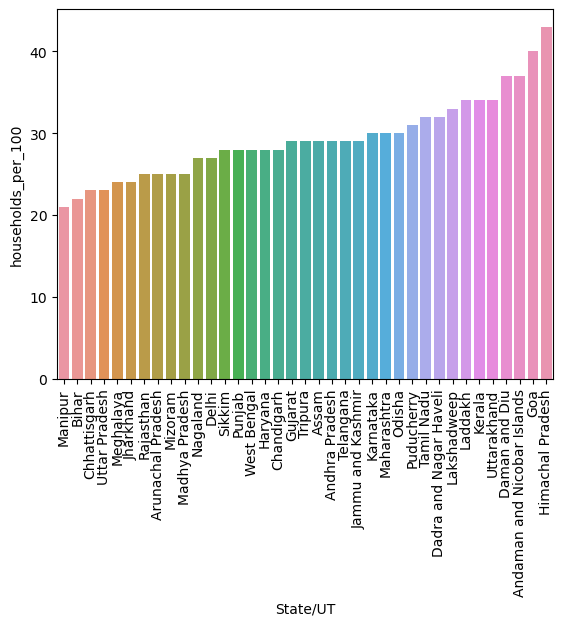

In [148]:
#visualizing Number of households for 100 people
new_df=census_data.groupby('State/UT')[['Population','Households']].sum()
new_df=pd.DataFrame(new_df).reset_index()
new_df['households_per_100']=round((new_df['Households']/new_df['Population'])*100)
sns.barplot(x='State/UT',y='households_per_100',data=new_df.sort_values(by='households_per_100'))
plt.xticks(rotation=90);

> From the plot,we can see that Himachal Pradesh is having highest households_per_100 value and the least is Manipur

In [150]:
#visualizing Percentage of households that have toilet(s) in premise to the total number of households.

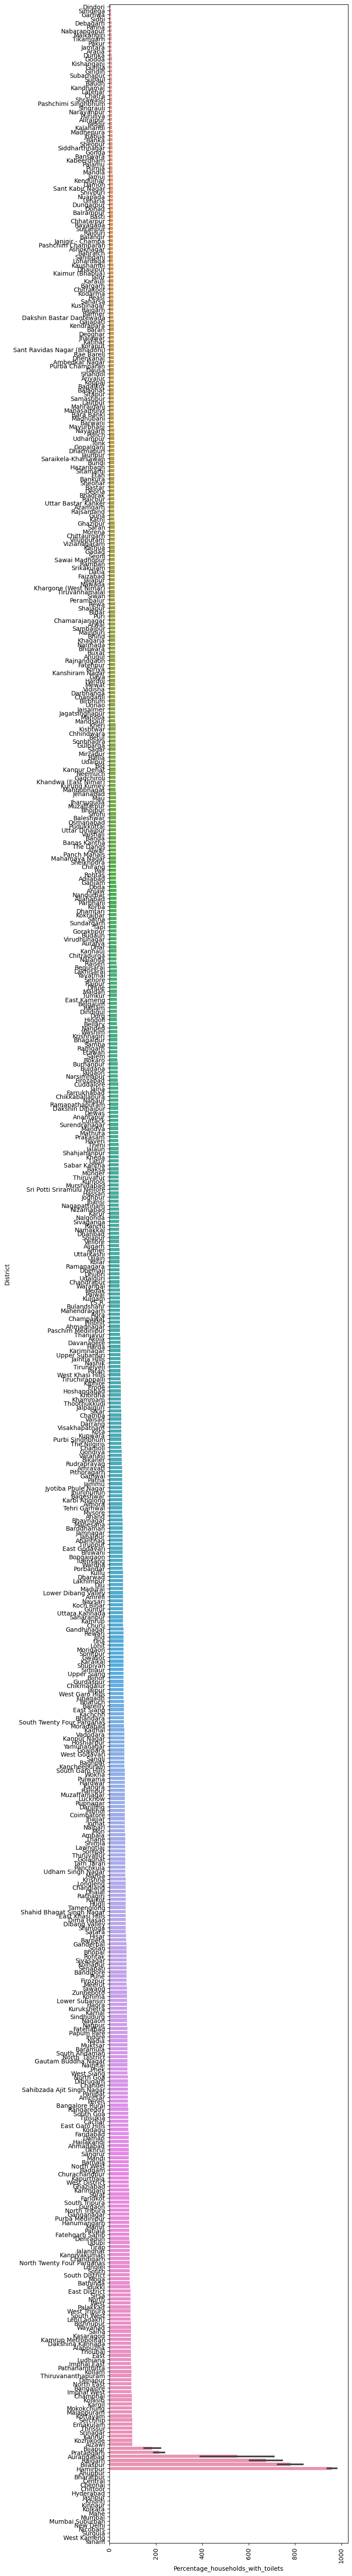

In [170]:
Modified_household_data['Percentage_households_with_toilets']=round(
    
    (Modified_household_data['Households_Rural_Toilet_Premise']+Modified_household_data['Households_Urban_Toilet_Premise'])/
    (Modified_household_data['Urban_Households']+Modified_household_data['Households_Rural'])*100)

plt.figure(figsize=(7,75))
sns.barplot(y='District',x='Percentage_households_with_toilets',data=Modified_household_data.sort_values(by='Percentage_households_with_toilets'),orient='h')
plt.xticks(rotation=90);
#plt.xticks(fontsize=8);

>The district Hamirpur is having highest Percentage_households_with_toilets and Dindori is having the least

In [ ]:
#To visualize Urban to rural population ratio we doesn't have the required data 


Problem Statement 9: (Inconsistency in different datasets)
After the updates, the“Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and see if there is a major difference between the values in the two files. A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data.


>The data 'Households_Rural','Households_Urban' in housing dataset is imported from census data itself. By this we can say that there will not be any difference between those data in two datasets.

Clean and gain Insightsfrom the Hospital Data
Aliah, as a representative of the department, is willing to know if any insights can be gained from the Hospital data (Data/hospitals.csv). Apart from general information she wants to know which states need more hospital beds at the earliest.
Assist Aliah to gain insights from the data after cleaning it. 

Problem Statement 10: (Fix the header)
Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file).
The header uses acronyms that are defined in metadata.csv. Find the data and rename the headers so that it is more understandable to users who are not familiar with the acronyms. The First cell in the header is missing which should be renamed to State/UT. Rename the other headers in a uniform format.

Problem Statement 11: (Create a function to alter the data to create uniformity)
The State/UT names have some different formats compared to other census and housing data. Manually identify those differences and fix them so that the State/UT names match exactly with the census and housing data.
A function should be created to perform this operation. Since the same operation is required for another dataset as well. 
After the process save the data in a CSV file named “all_hospitals.csv” in the “Clean_Data” folder

Problem Statement 12: (Analyze Healthcare facility disparity)
Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. The national value should also be represented in the same visualization such that the value for each state can be compared to it.  
Hint:


Report three States/UTs which have the least amount of beds for their population so that more beds can be added to the hospitals in respective states.


Problem Statement 10: (Fix the header)
Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file).
The header uses acronyms that are defined in metadata.csv. Find the data and rename the headers so that it is more understandable to users who are not familiar with the acronyms. The First cell in the header is missing which should be renamed to State/UT. Rename the other headers in a uniform format.


In [20]:
#importing dataset
hospital_data=pd.read_csv('hospitals.csv')
#renaming columns
hospital_data.rename(columns={'Unnamed: 0':'State/UT','PHC':'Primary Health Centers','CHC':'Community Health Centers','SDH':'Sub-District/Divisional Hospitals','DH':'District Hospitals'},inplace=True)
hospital_data

,State/UT,Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra & Nagar Haveli,9,2,1,1,13,568
8,Daman & Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


Problem Statement 11: (Create a function to alter the data to create uniformity)
The State/UT names have some different formats compared to other census and housing data. Manually identify those differences and fix them so that the State/UT names match exactly with the census and housing data.
A function should be created to perform this operation. Since the same operation is required for another dataset as well. 
After the process save the data in a CSV file named “all_hospitals.csv” in the “Clean_Data” folder

In [21]:
#function to fix state names
def fix_names_of_states(state):
    state=state.replace('*','')
    if state == 'Andaman & Nicobar Islands':
        return 'Andaman and Nicobar Islands'
    elif state == 'Dadra & Nagar Haveli':
        return 'Dadra and Nagar Haveli'
    elif state == 'Daman & Diu':
        return 'Daman and Diu'
    elif state == 'Jammu & Kashmir':
        return 'Jammu and Kashmir'
    elif state == 'INDIA':
        return 'All India'
    else:
        return state

In [22]:
#applying function
hospital_data['State/UT']=hospital_data['State/UT'].apply(fix_names_of_states)
hospital_data

,State/UT,Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra and Nagar Haveli,9,2,1,1,13,568
8,Daman and Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


In [23]:
path = "Clean_Data/all_hospitals.csv"
hospital_data.to_csv(path, index=False)

print("Csv file saved succesfully")

Csv file saved succesfully


Problem Statement 12: (Analyze Healthcare facility disparity)
Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. The national value should also be represented in the same visualization such that the value for each state can be compared to it.  
Hint:


Report three States/UTs which have the least amount of beds for their population so that more beds can be added to the hospitals in respective states.

In [36]:
populations=census_data.groupby('State/UT')['Population'].sum()
population_data=pd.DataFrame(populations)
updated_hospital_data=pd.merge(hospital_data,population_data,on='State/UT',how='outer') 
l=updated_hospital_data[updated_hospital_data['State/UT']=='Laddakh'].index
updated_hospital_data.drop(l,inplace=True)
updated_hospital_data



,State/UT,Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,380581.0
1,Andhra Pradesh,1417,198,31,20,1666,60799,49386799.0
2,Arunachal Pradesh,122,62,NaN,15,199,2320,1383727.0
3,Assam,1007,166,14,33,1220,19115,31205576.0
4,Bihar,2007,63,33,43,2146,17796,104099452.0
5,Chandigarh,40,2,1,4,47,3756,1055450.0
6,Chhattisgarh,813,166,12,32,1023,14354,25545198.0
7,Dadra and Nagar Haveli,9,2,1,1,13,568,343709.0
8,Daman and Diu,4,2,NaN,2,8,298,243247.0
9,Delhi,534,25,9,47,615,20572,16787941.0


In [37]:
#adding all india population
Total_population=updated_hospital_data['Population'].sum().astype(int)
updated_hospital_data.loc[updated_hospital_data['State/UT']=='All India','Population']=Total_population

In [38]:
#Calculating and visualizing beds per 10k
updated_hospital_data['HospitalBeds'] = updated_hospital_data['HospitalBeds'].str.replace(',', '').astype(int)
updated_hospital_data['Beds_per_10k']=round(updated_hospital_data['HospitalBeds']/(updated_hospital_data['Population']/10000))
updated_hospital_data

,State/UT,Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_10k
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,3.805810e+05,33.0
1,Andhra Pradesh,1417,198,31,20,1666,60799,4.938680e+07,12.0
2,Arunachal Pradesh,122,62,NaN,15,199,2320,1.383727e+06,17.0
3,Assam,1007,166,14,33,1220,19115,3.120558e+07,6.0
4,Bihar,2007,63,33,43,2146,17796,1.040995e+08,2.0
5,Chandigarh,40,2,1,4,47,3756,1.055450e+06,36.0
6,Chhattisgarh,813,166,12,32,1023,14354,2.554520e+07,6.0
7,Dadra and Nagar Haveli,9,2,1,1,13,568,3.437090e+05,17.0
8,Daman and Diu,4,2,NaN,2,8,298,2.432470e+05,12.0
9,Delhi,534,25,9,47,615,20572,1.678794e+07,12.0


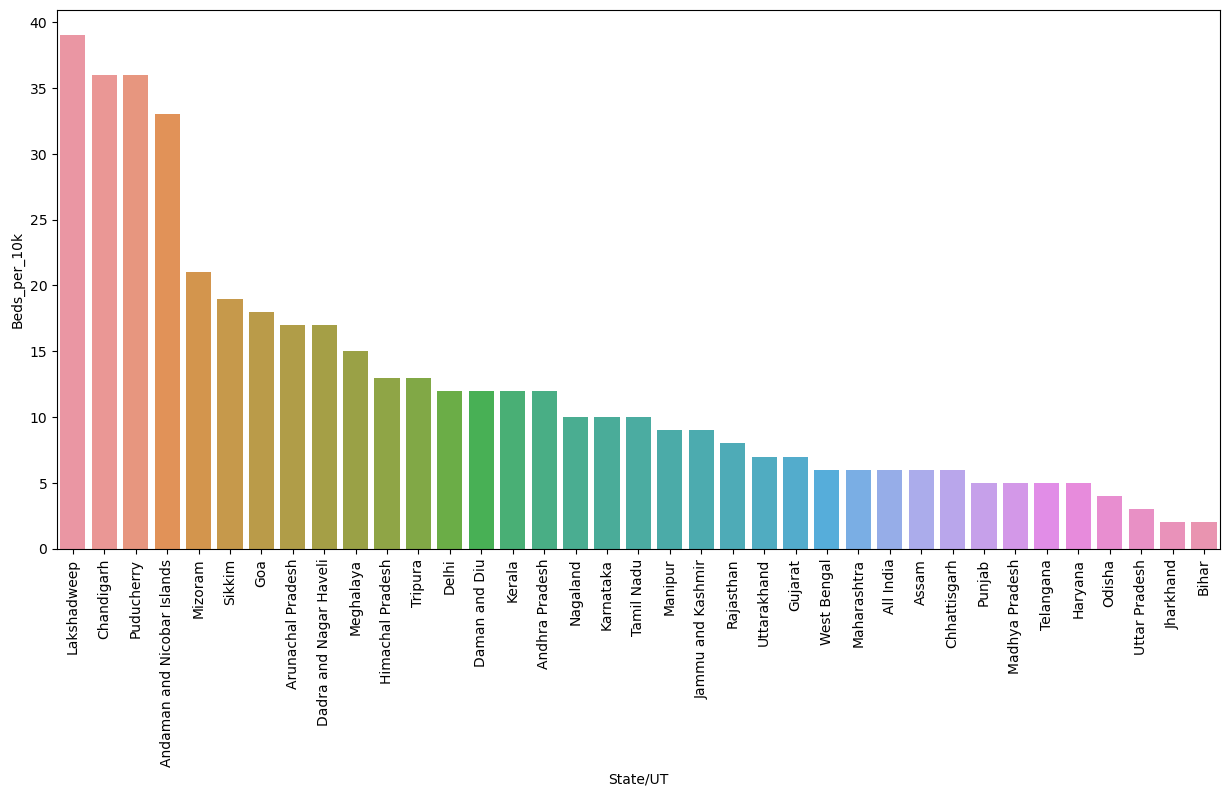

In [40]:
#calculating beds per 10k
#updated_hospital_data['HospitalBeds'] = updated_hospital_data['HospitalBeds'].str.replace(',', '').astype(int)
updated_hospital_data['Beds_per_10k']=round(updated_hospital_data['HospitalBeds']/(updated_hospital_data['Population']/10000))

# Sort the data by hospital beds per 10,000 people
sorted_data = updated_hospital_data.sort_values('Beds_per_10k', ascending=False)

# Plot the data
plt.figure(figsize=(15, 7))
sns.barplot(x='State/UT',y='Beds_per_10k',data=sorted_data)
plt.xticks(rotation=90);

>Lakshadweep is having highest value of beds per 10k followed by Chandigarh and bihar is having the least followed by jharkhand.

In [41]:
Least_three_states_with_beds=sorted_data[-3:].reset_index()
Least_three_states_with_beds

,index,State/UT,Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_10k
0,33,Uttar Pradesh,3277,671,NaN,174,4122,58310,199812341.0,3.0
1,15,Jharkhand,343,179,13,23,558,7404,32988134.0,2.0
2,4,Bihar,2007,63,33,43,2146,17796,104099452.0,2.0


> Report : The three state/UT which have the least amount of beds for their population are Uttar Pradesh,Jharkhand,Bihar.

> These states needed to be considered for addition of hospital beds

Government Hospitals Requirement Analysis
The Union of Doctors in its meeting passed a resolution that the government hospitals are lacking in numbers in many states, The government has taken notice of the resolution and has asked for a recommendation for the state where a new government hospital can be set up. 
Use the government hospital data (Data/government_hospitals.csv) to suggest which state the government should create a new hospital.

Problem Statement 13: (Multi-line header)
The header in (Data/government_hospitals.csv) is in 2 rows 
States/UTs	Rural hospitals	Urban hospitals	As on
	No.	Beds	No.	Beds	

The headers are required to be edited for ease of future use as well as for the sake of uniformity. 

Import and update the data in a way that it has the following column names
	State/UT
	Rural_Government_Hospitals
	Rural_Government_Beds
	Urban_Government_Hospitals
	Urban_Government_Beds
	Last_Updated

Problem Statement 14: (Data update and code reuse)
The ”Last_Updated” column contains a date that is in the format  DD.MM.YYYY but in the future, the date is required in a different format (YYYY-MM-DD)  update the date to the required format.
The State/UT names have some different formats compared to other census and housing data. Fix those issues using the function created earlier. If the function created earlier for all_hospitals cannot be used for government_hospital then edit the function so that it can be used for both.
Create a new file “government_hospital.csv” in the “Clean” folder and save all the government hospital data after the update.


Problem Statement 15: (Government healthcare facility disparity)
Since the resources are limited, it is required to identify the region which lacks the healthcare facility the most for creating new government hospitals.
An idea was suggested* that first the three States/UTs which have the least amount of beds (in all hospitals government and private) for their population is identified. Among those three the state which has the least number of government hospitals can be recommended for setting up a new government hospital.


Problem Statement 13: (Multi-line header)
The header in (Data/government_hospitals.csv) is in 2 rows 
States/UTs	Rural hospitals	Urban hospitals	As on
	No.	Beds	No.	Beds	

The headers are required to be edited for ease of future use as well as for the sake of uniformity. 

Import and update the data in a way that it has the following column names
	State/UT
	Rural_Government_Hospitals
	Rural_Government_Beds
	Urban_Government_Hospitals
	Urban_Government_Beds
	Last_Updated

In [42]:
Government_hospitals_data=pd.read_csv('government_hospitals.csv',skiprows=1)
Government_hospitals_data.rename(columns={'Unnamed: 0':'State/UT','No.':'Rural_Government_Hospitals','Beds':'Rural_Government_Beds','No..1':'Urban_Government_Hospitals','Beds.1':'Urban_Government_Beds','Unnamed: 5':'Last_Updated'},inplace=True)
Government_hospitals_data

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,01.01.2017
1,Arunachal Pradesh*,208,2136,10,268,31.12.2017
2,Assam,1176,10944,50,6198,31.12.2017
3,Bihar,930,6083,103,5936,31.12.2016
4,Chhattisgarh,169,5070,45,4342,01.01.2016
5,Goa*,17,1405,25,1608,31.12.2017
6,Gujarat,364,11715,122,20565,31.12.2016
7,Haryana*,609,6690,59,4550,31.12.2016
8,Himachal Pradesh*,705,5665,96,6734,31.12.2017
9,Jammu & Kashmir,56,7234,76,4417,30.12.2016


In [43]:
Government_hospitals_data.dtypes

State/UT                      object
Rural_Government_Hospitals     int64
Rural_Government_Beds          int64
Urban_Government_Hospitals     int64
Urban_Government_Beds          int64
Last_Updated                  object
dtype: object

Problem Statement 14: (Data update and code reuse)
The ”Last_Updated” column contains a date that is in the format  DD.MM.YYYY but in the future, the date is required in a different format (YYYY-MM-DD)  update the date to the required format.
The State/UT names have some different formats compared to other census and housing data. Fix those issues using the function created earlier. If the function created earlier for all_hospitals cannot be used for government_hospital then edit the function so that it can be used for both.
Create a new file “government_hospital.csv” in the “Clean” folder and save all the government hospital data after the update.


In [44]:
import datetime
#updating date format
Government_hospitals_data['Last_Updated'] = pd.to_datetime(Government_hospitals_data['Last_Updated'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')
#fixing the names of the states
Government_hospitals_data['State/UT']=Government_hospitals_data['State/UT'].apply(fix_names_of_states)
Government_hospitals_data

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01
5,Goa,17,1405,25,1608,2017-12-31
6,Gujarat,364,11715,122,20565,2016-12-31
7,Haryana,609,6690,59,4550,2016-12-31
8,Himachal Pradesh,705,5665,96,6734,2017-12-31
9,Jammu and Kashmir,56,7234,76,4417,2016-12-30


In [45]:
path = "Clean_Data/government_hospital.csv.csv"
Government_hospitals_data.to_csv(path, index=False)

print("Csv file saved succesfully")

Csv file saved succesfully



Problem Statement 15: (Government healthcare facility disparity)
Since the resources are limited, it is required to identify the region which lacks the healthcare facility the most for creating new government hospitals.
An idea was suggested* that first the three States/UTs which have the least amount of beds (in all hospitals government and private) for their population is identified. Among those three the state which has the least number of government hospitals can be recommended for setting up a new government hospital.

<Axes: xlabel='State/UT', ylabel='Total_Government_Hospitals'>

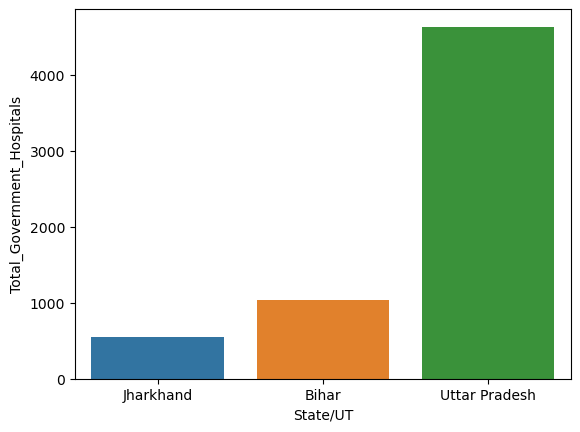

In [46]:

#Merging the data of least beds state and government hospital data to generate report
New_merged_data=pd.merge(Least_three_states_with_beds[['State/UT','Beds_per_10k']],Government_hospitals_data[['State/UT','Urban_Government_Hospitals','Rural_Government_Hospitals']],on='State/UT')
New_merged_data['Total_Government_Hospitals']=New_merged_data['Urban_Government_Hospitals']+New_merged_data['Rural_Government_Hospitals']
sorted_states=New_merged_data.sort_values(by=['Total_Government_Hospitals'])
sns.barplot(x='State/UT',y='Total_Government_Hospitals',data=sorted_states)

>we can see that Jharkhand is having the least number of government hospitals which can be recommended for setting up a new government hospital.

World Health Organization Standards
According to WHO standards, a minimum of 3 beds per 1000 people is required. Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?

Problem Statement 16: (Gap in number of beds)
Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).

Problem Statement 17: (Hospitals required to meet the standards)
In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?
Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards in the region, and round the number to the nearest integer to find the value.
Represent the findings visually.


World Health Organization Standards
According to WHO standards, a minimum of 3 beds per 1000 people is required. Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?

Problem Statement 16: (Gap in number of beds)
Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).


In [47]:
updated_hospital_data

,State/UT,Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_10k
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,3.805810e+05,33.0
1,Andhra Pradesh,1417,198,31,20,1666,60799,4.938680e+07,12.0
2,Arunachal Pradesh,122,62,NaN,15,199,2320,1.383727e+06,17.0
3,Assam,1007,166,14,33,1220,19115,3.120558e+07,6.0
4,Bihar,2007,63,33,43,2146,17796,1.040995e+08,2.0
5,Chandigarh,40,2,1,4,47,3756,1.055450e+06,36.0
6,Chhattisgarh,813,166,12,32,1023,14354,2.554520e+07,6.0
7,Dadra and Nagar Haveli,9,2,1,1,13,568,3.437090e+05,17.0
8,Daman and Diu,4,2,NaN,2,8,298,2.432470e+05,12.0
9,Delhi,534,25,9,47,615,20572,1.678794e+07,12.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_3104\4195958326.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(labels);


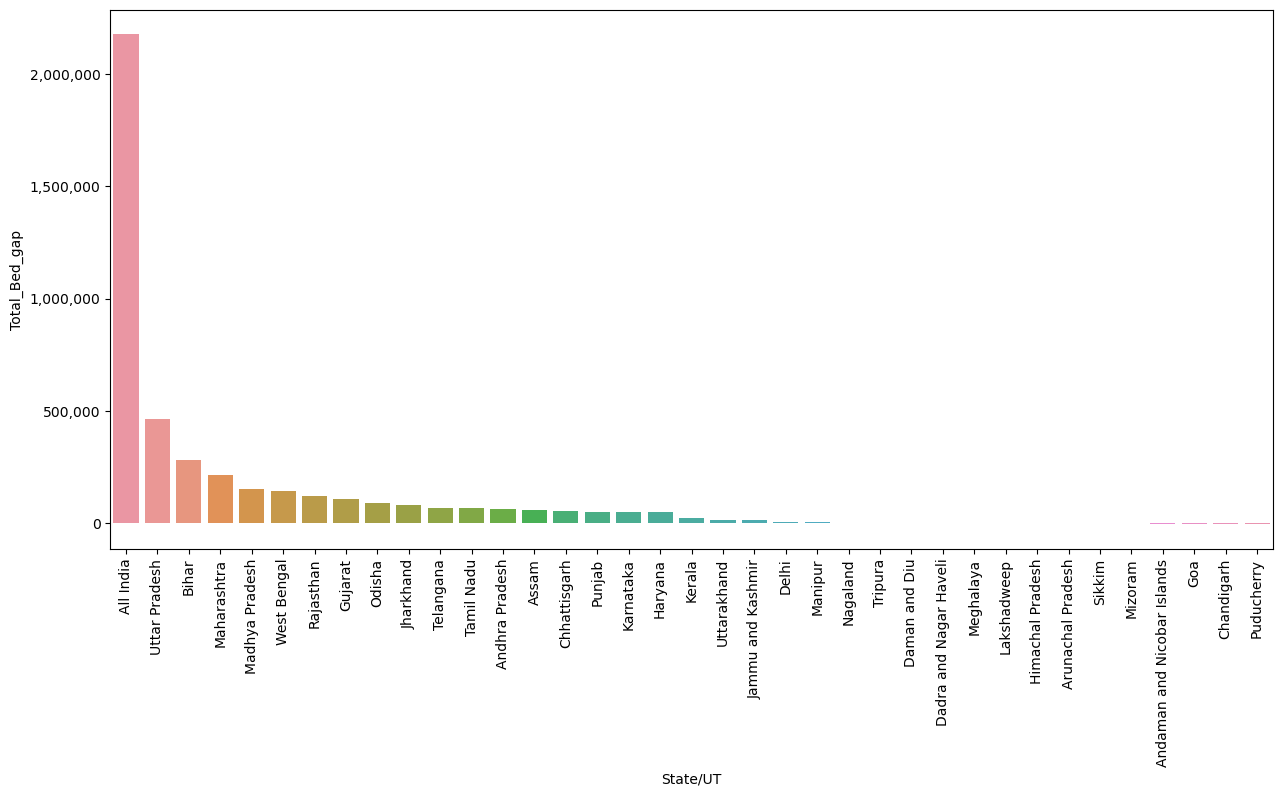

In [74]:
#getting population data from census data
populations=census_data.groupby('State/UT')['Population'].sum()
p=pd.DataFrame(populations)
private_hospitals=updated_hospital_data[['State/UT','HospitalBeds','Population']]
#merging population with hospital data for further calculations
updated_Government_hospital_data=pd.merge(Government_hospitals_data,private_hospitals,on='State/UT',how='outer')
updated_Government_hospital_data['Expected_beds']=round(updated_Government_hospital_data['Population']/1000)*3
updated_Government_hospital_data['Govt_Available_beds']=updated_Government_hospital_data['Rural_Government_Beds']+updated_Government_hospital_data['Urban_Government_Beds']
updated_Government_hospital_data['Total_Available_beds']=updated_Government_hospital_data['Rural_Government_Beds']+updated_Government_hospital_data['Urban_Government_Beds']+updated_Government_hospital_data['HospitalBeds']
updated_Government_hospital_data['Total_Bed_gap']=updated_Government_hospital_data['Expected_beds']-updated_Government_hospital_data['Total_Available_beds']
updated_Government_hospital_data['Govt_Bed_gap']=updated_Government_hospital_data['Expected_beds']-updated_Government_hospital_data['Govt_Available_beds']
plt.figure(figsize=(15,7))
sns.barplot(x='State/UT',y='Total_Bed_gap',data=updated_Government_hospital_data.sort_values(by='Total_Bed_gap',ascending=False))
plt.xticks(rotation=90);

ticks = plt.gca().get_yticks()

# Converting scientific notation to decimal notation
labels = [f'{tick:,.0f}' for tick in ticks]

# 
plt.gca().set_yticklabels(labels);

>Total bed gap is more in national level i.e; all India and In the states Uttar Pradesh is having highest bed gap followed by bihar

Problem Statement 17: (Hospitals required to meet the standards)
In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?
Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards in the region, and round the number to the nearest integer to find the value.
Represent the findings visually.

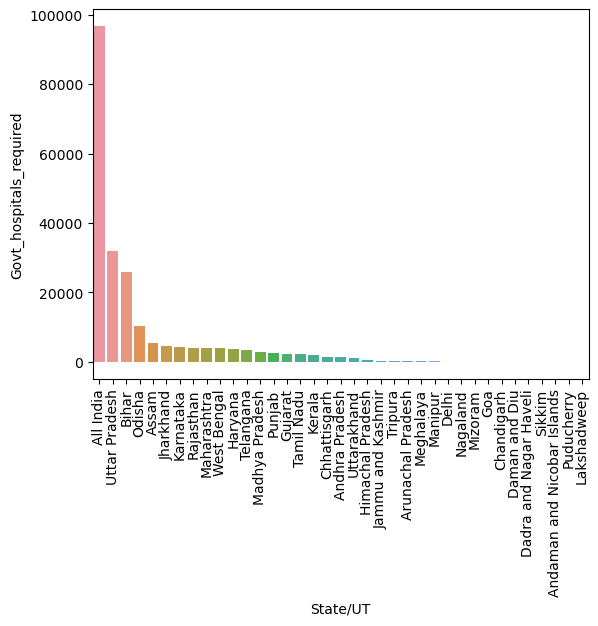

In [75]:
updated_Government_hospital_data['Total_Govt_Hospitals']=updated_Government_hospital_data['Urban_Government_Hospitals']+updated_Government_hospital_data['Rural_Government_Hospitals']
updated_Government_hospital_data['Govt_hospitals_required']=updated_Government_hospital_data['Govt_Bed_gap']/(updated_Government_hospital_data['Govt_Available_beds']/updated_Government_hospital_data['Total_Govt_Hospitals'])
updated_Government_hospital_data['Govt_hospitals_required']=updated_Government_hospital_data['Govt_hospitals_required'].round().astype(int)


#plotting the data
sns.barplot(x='State/UT',y='Govt_hospitals_required',data=updated_Government_hospital_data.sort_values(by='Govt_hospitals_required',ascending=False))
plt.xticks(rotation=90);

>the highest number of government hospitals required is in the state Uttar Pradesh followed by Bihar